In [1]:
# Importing requried librarires :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset :

df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Number of rows and columns :

df.shape

(101766, 50)

# Dropping records for 'readmitted'= '>30'

#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']
#dropping rows with NAs.
df.dropna(inplace=True)

In [5]:
#removing readmitted'= '>30' entries for df
df=df[df['readmitted']!='>30']

# dropping rows with NAs.
#df.dropna(inplace=True)

In [6]:
df.shape

(66221, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66221 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              66221 non-null  int64 
 1   patient_nbr               66221 non-null  int64 
 2   race                      66221 non-null  object
 3   gender                    66221 non-null  object
 4   age                       66221 non-null  object
 5   weight                    66221 non-null  object
 6   admission_type_id         66221 non-null  int64 
 7   discharge_disposition_id  66221 non-null  int64 
 8   admission_source_id       66221 non-null  int64 
 9   time_in_hospital          66221 non-null  int64 
 10  payer_code                66221 non-null  object
 11  medical_specialty         66221 non-null  object
 12  num_lab_procedures        66221 non-null  int64 
 13  num_procedures            66221 non-null  int64 
 14  num_medications      

In [8]:
#pd.options.display.max_colwidth = None   # to view all the data

#replacing 0 with np.nan for all columns accept 'outcome'

#df_ind=df[:]

df.iloc[:,:-1]=df.iloc[:,:-1].replace({0:np.nan})

# Missing value percentage calculation :

In [9]:
# checking missing value percentage:

percenatge = []
for i in df.columns:
    p = (df[df[i]=='?'].shape[0]/df.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing[df_missing['percentage of missing']>0]

,percentage of missing
weight,97.452470
medical_specialty,47.919844
payer_code,39.908790
race,2.620015
diag_3,1.638453
diag_2,0.428867
diag_1,0.025672


In [10]:
df1 = df.copy()

# Missing values imputation :

In [11]:
# 1). gender : Replacing 'Unknown/Invalid' with mode of gender, because only 3 values are missing/unkown :

df1.replace(['Unknown/Invalid'],df1['gender'].mode()[0],inplace=True)
df1['gender'].value_counts()

Female    35193
Male      31028
Name: gender, dtype: int64

In [12]:
# Replace '?' with 'NaN' :

df1.replace(['?'],np.nan,inplace=True)

In [13]:
# 2). race : we will include nan values in 'Other' , which is already present in it

df1['race']=df1['race'].fillna('Other')

In [14]:
df1['race'].value_counts()

Caucasian          48975
AfricanAmerican    12576
Other               2795
Hispanic            1395
Asian                480
Name: race, dtype: int64

In [15]:
# 3). diag_1 : 21 missing values (i,e ... 0.02%, so impute with mode)

df1['diag_1'] = df1['diag_1'].fillna('Other')

In [16]:
# 4). diag_2 : 0.35% of missing values, so impute with mode 
df1['diag_2'] = df1['diag_2'].fillna('Other')

In [17]:
# 5). diag_3 : 1.3% of missing values, so impute with mode 
df1['diag_3'] = df1['diag_3'].fillna('Other')

In [18]:
percenatge = []
for i in df1.columns:
    p = (df1[df1[i]=='?'].shape[0]/df1.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df1.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing

,percentage of missing
encounter_id,0.0
troglitazone,0.0
chlorpropamide,0.0
glimepiride,0.0
acetohexamide,0.0
glipizide,0.0
glyburide,0.0
tolbutamide,0.0
pioglitazone,0.0
rosiglitazone,0.0


In [19]:
#data visualisation #sri hari

In [20]:
#numerical columns

In [21]:
numerical_columns=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [22]:
def boxplot_for_outlier(df1,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df1[columns[count]],ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1

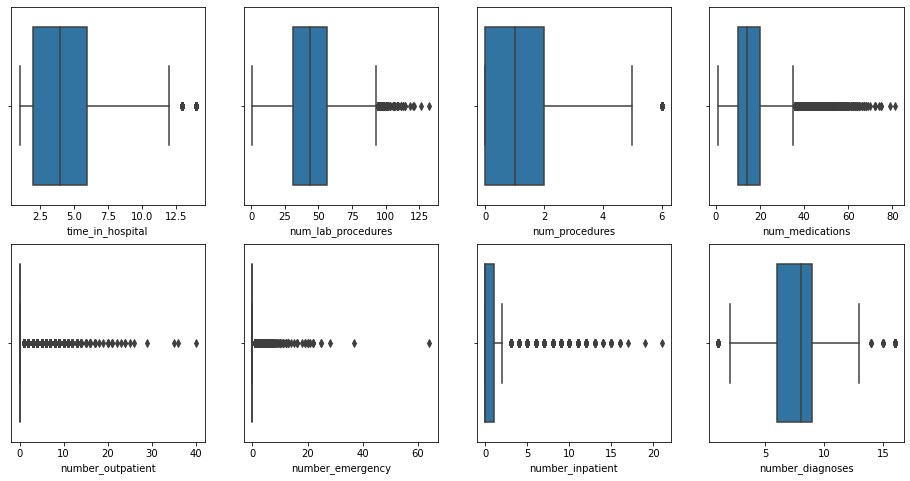

In [23]:
boxplot_for_outlier(df,numerical_columns)

In [24]:
#gender distribution

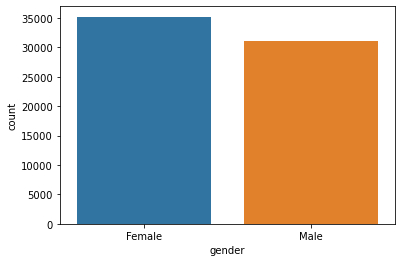

In [25]:
sns.countplot(x=df1['gender'])
plt.show()

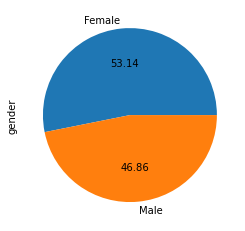

In [26]:
df1['gender'].value_counts().plot.pie(autopct='%1.2f')
plt.show()

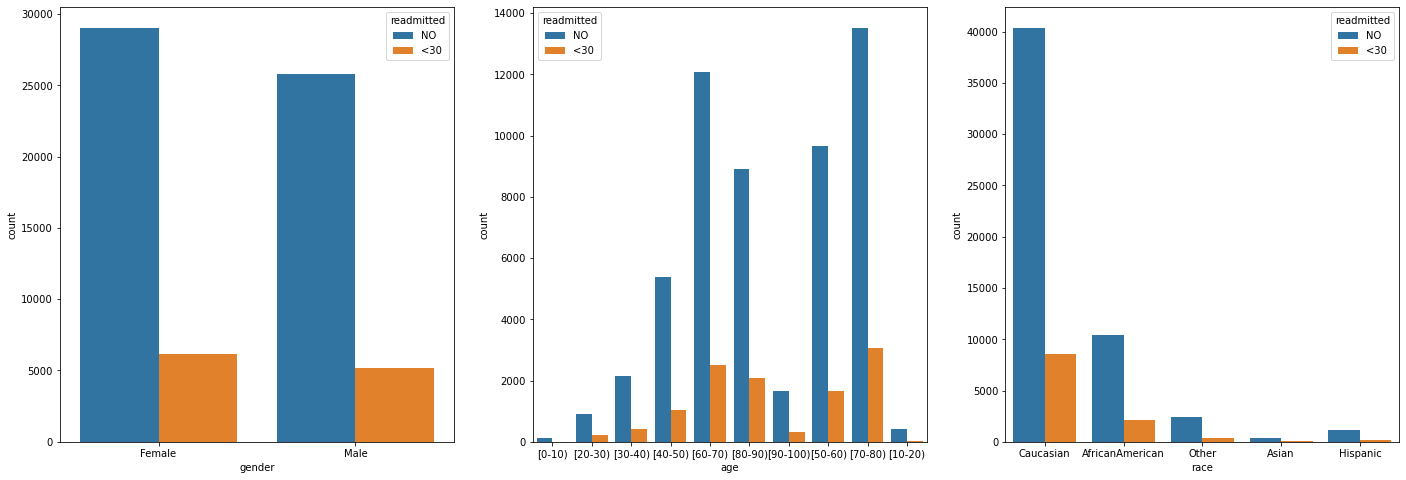

In [27]:
visual_list=['gender','age','race']
f,ax=plt.subplots(1,3,figsize=(24,8))
count=0
for i in visual_list:
    sns.countplot(x=df1[i],hue=df1.readmitted,ax=ax[count])
    count=count+1

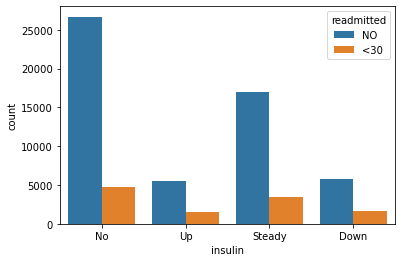

In [28]:
sns.countplot(x='insulin',hue='readmitted',data=df1)
plt.show()

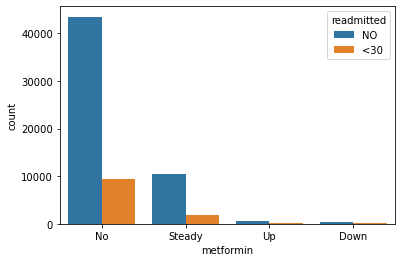

In [29]:
sns.countplot(x='metformin',hue='readmitted',data=df1)
plt.show()

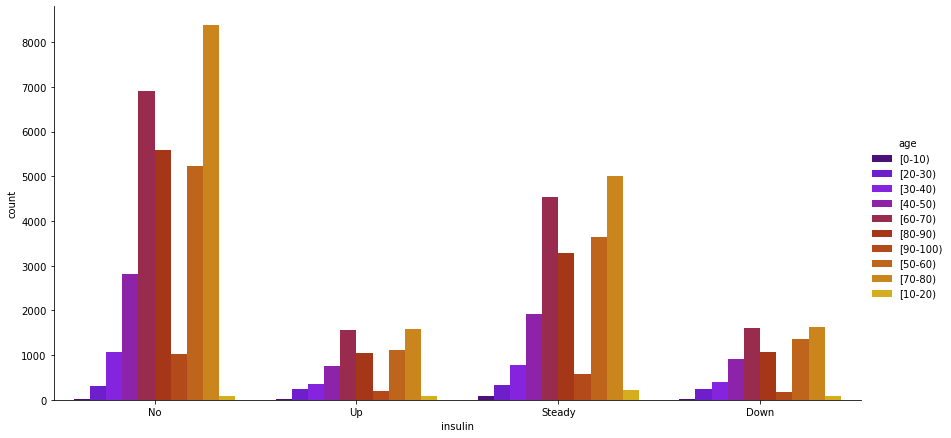

In [30]:
#age_list = list(df.age.unique())
sns.catplot(x="insulin", hue="age", data=df1, kind="count", height=6, aspect=2, palette="gnuplot");

In [31]:
#dropping cols with high number of missing values
df1 = df1.drop(['payer_code','medical_specialty'],axis=1)

In [32]:
#Dropping admission_type_id', 'discharge_disposition_id', 'admission_source_id' :

df1=df1.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1) 

In [33]:
df1 = df1.drop(['weight', ],axis=1)

In [34]:
df1 = df1.drop(['encounter_id','patient_nbr'],axis=1)

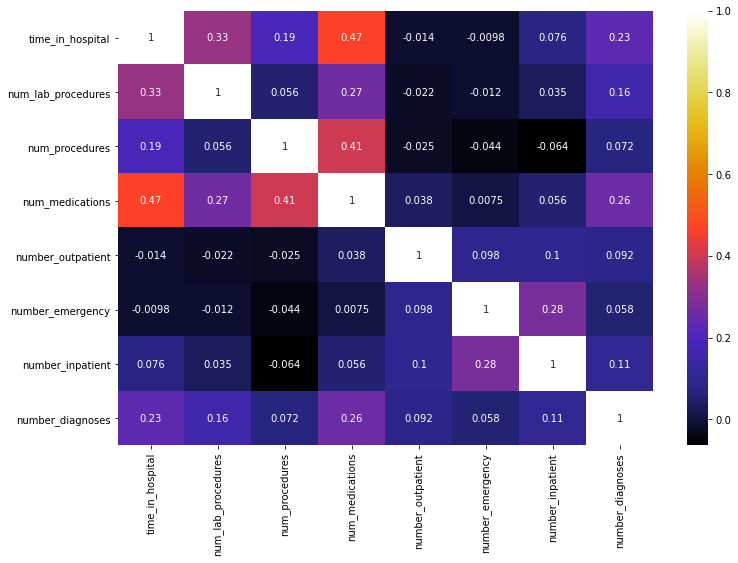

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.corr(), annot =True, cmap='CMRmap')
plt.show()

In [36]:
df1.shape

(66221, 42)